# Neural network classification with TensorFlow

In this notebook, we try to learn simple neural network classification problems. 


A few types of classification problems:



*   Binary classification
*   Mutliclass classification
* Multilabel classification


[See full course materials on GitHub](https://github.com/mrdbourke/tensorflow-deep-learning/)

###Creating data

In [2]:
from sklearn.datasets import make_circles
num_of_samples = 100
X, y = make_circles(num_of_samples,
                   noise = 0.02,
                   random_state = 42)

In [3]:
X[:5],y[:5]

(array([[-0.41593533, -0.69359675],
        [ 0.75334204,  0.32057287],
        [-0.64298186,  0.48216909],
        [ 0.79109029, -0.59002501],
        [ 0.75834745, -0.70702507]]),
 array([1, 1, 1, 0, 0]))

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,-0.415935,-0.693597,1
1,0.753342,0.320573,1
2,-0.642982,0.482169,1
3,0.791090,-0.590025,0
4,0.758347,-0.707025,0
...,...,...,...
95,0.245070,0.751121,1
96,-0.669186,0.376724,1
97,-0.202035,0.970722,0
98,0.425947,-0.691332,1


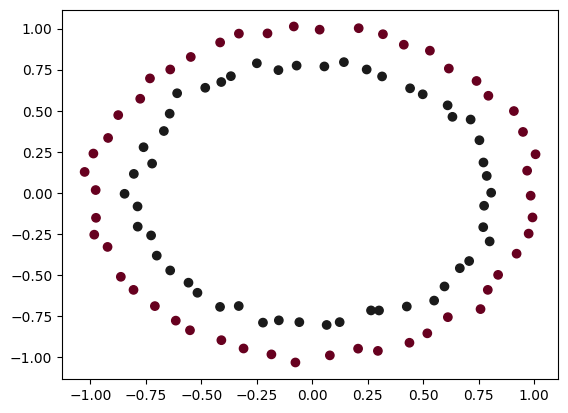

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdGy)

### Modelling

In [6]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_1.evaluate(X,y)

4/4 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6937280893325806, 0.5]

### Improving a Model

*   Adding layers
*   Increase the number of hidden units
*   Change the activation function
*   Change the optimization function 
*   Change the learning rate
*   Fitting on more data
*   Fitting for longer




In [7]:
# Adding hidden Layer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

model_2.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_2.evaluate(X,y)

4/4 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.5000


[0.17347125709056854, 0.5]

In [8]:
# Change Optimizer
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

model_3.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_3.evaluate(X,y)

4/4 [==============================] - 0s 7ms/step - loss: 0.6403 - accuracy: 0.5000


[0.6403406262397766, 0.5]

In [9]:
# Increase the number of hidden units
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model_4.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_4.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_4.evaluate(X,y)

4/4 [==============================] - 0s 4ms/step - loss: 0.1733 - accuracy: 0.4975


[0.17331254482269287, 0.4975000023841858]

In [10]:
#Add hidden layer and increase the number of hidden units
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model_5.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_5.evaluate(X,y)

4/4 [==============================] - 0s 4ms/step - loss: 0.1735 - accuracy: 0.5000


[0.17353498935699463, 0.5]

In [11]:
#Incerase number of epoch and layer number
tf.random.set_seed(42)

#hidden layers and neurons randomly setted
#model accuracy tested
model_6 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(500),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(500),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)

])
model_6.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_6.evaluate(X,y)


4/4 [==============================] - 0s 5ms/step - loss: 0.1742 - accuracy: 0.5000


[0.17422279715538025, 0.5]

###Visulize

In [12]:
import numpy as np

In [13]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdGy, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdGy)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


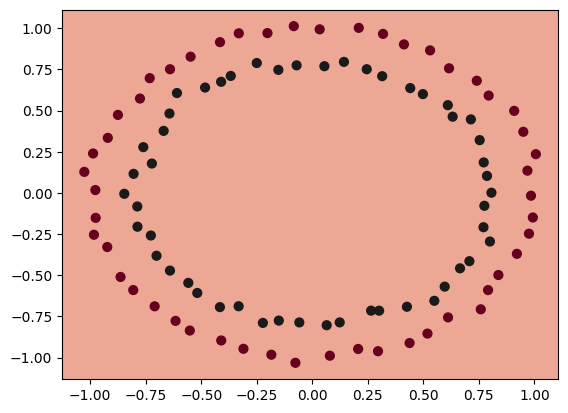

In [14]:
plot_decision_boundary(model = model_6,
                       X=X, 
                       y=y)

### Non-linearity

In [15]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

model_7.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_7.evaluate(X,y)


4/4 [==============================] - 0s 4ms/step - loss: 4.2604 - accuracy: 0.4956


[4.260412216186523, 0.49562498927116394]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


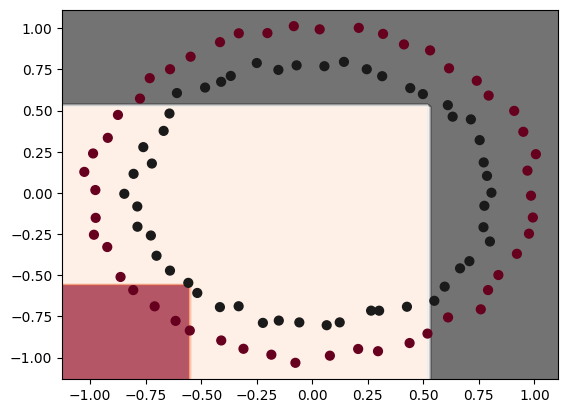

In [16]:
plot_decision_boundary(model = model_7,
                       X=X, 
                       y=y)

Let's try build first neural network with a non-linear activation function

In [17]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_8.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

model_8.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_8.evaluate(X,y)


4/4 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000


[7.7124738693237305, 0.5]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


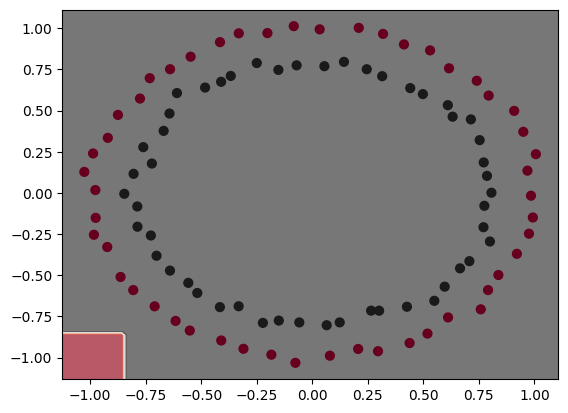

In [18]:
plot_decision_boundary(model = model_8,
                       X=X, 
                       y=y)

In [19]:
#Increase hidden  layer number and find optimal number of neuron 
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(2,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(2,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

model_9.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_9.evaluate(X,y)


4/4 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000


[7.7124738693237305, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


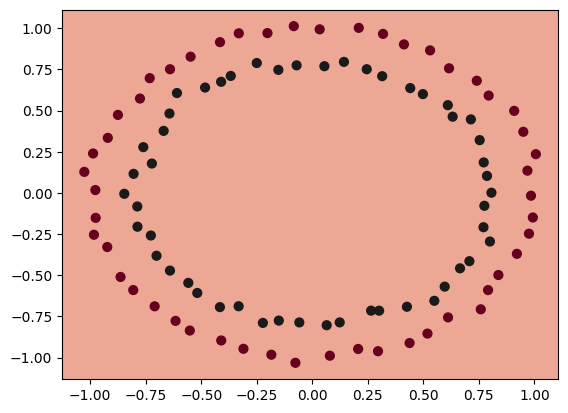

In [20]:
plot_decision_boundary(model = model_9,
                       X=X, 
                       y=y)

In [21]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_10.fit(X, y, epochs=200, verbose=0)
model_10.evaluate(X,y)
     


4/4 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 1.0000


[0.026000773534178734, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


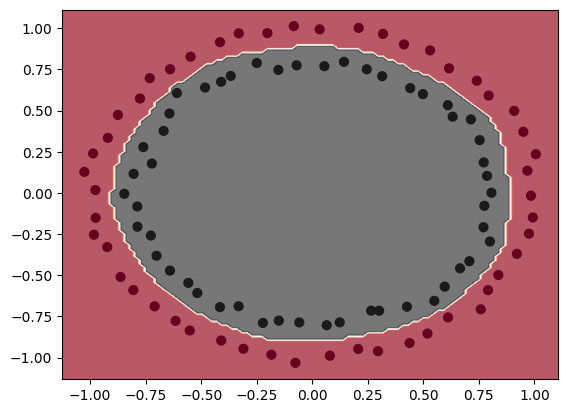

In [22]:
plot_decision_boundary(model = model_10,
                       X=X, 
                       y=y)


### Evaluating and Imporving Model

In [23]:
len(X)

100

In [24]:
X_train, y_train = X[:80], y[:80] 
X_test, y_test = X[80:], y[80:] 

X_train.shape, X_test.shape 

((80, 2), (20, 2))

In [25]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

model_11.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_11.fit(X, y, epochs=200, verbose=0)
model_11.evaluate(X,y)
     


4/4 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 1.0000


[0.030335936695337296, 1.0]

In [26]:
loss, accuracy = model_11.evaluate(X_test, y_test)


1/1 [==============================] - 0s 27ms/step - loss: 0.0192 - accuracy: 1.0000


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


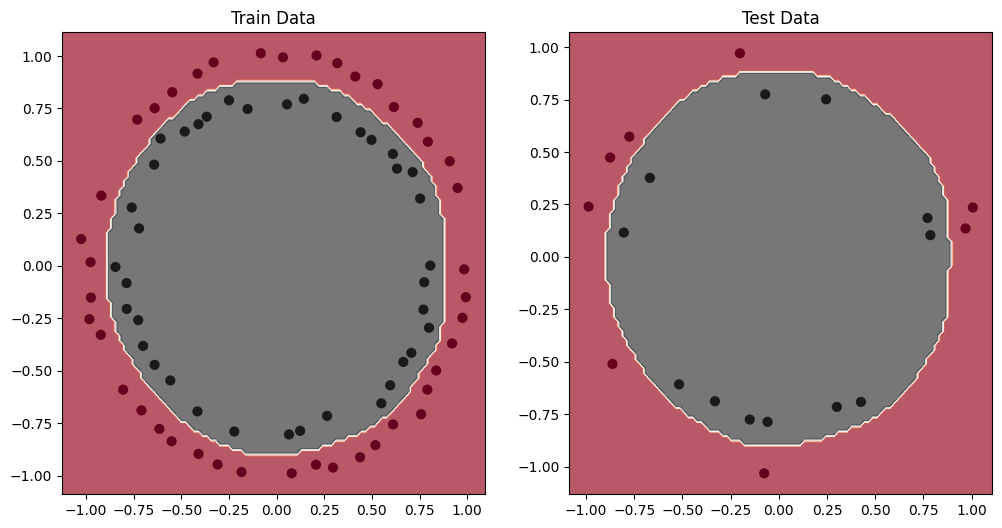

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train Data")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show()

### Plot the loss curves

Text(0.5, 1.0, 'Model_11 training curves')

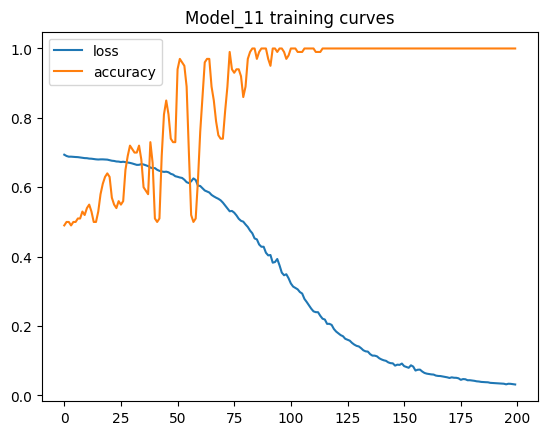

In [28]:
pd.DataFrame(history.history).plot()
plt.title("Model_11 training curves")

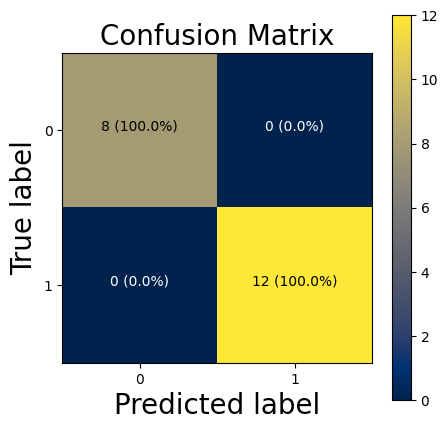

In [40]:
import itertools

figsize = (5, 5)
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.cividis) 
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="black" if cm[i, j] > threshold else "white",
           size=10)